# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tangalle
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | berdigestyakh
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | mchinji
Processing Record 6 of Set 1 | guymon
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | freetown
Processing Record 17 of Set 1 | naze
Processing Record 18 of Set 1 | san julian
Processing Record 19 of Set 1 | tazovsky
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | aral
Processing Record 22 of Set 1 | debre mark'os
Processing 

Processing Record 42 of Set 4 | antsirabe afovoany
City not found. Skipping...
Processing Record 43 of Set 4 | fale old settlement
Processing Record 44 of Set 4 | jose maria morelos
Processing Record 45 of Set 4 | udachny
Processing Record 46 of Set 4 | longonjo
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | gjovik
Processing Record 49 of Set 4 | durango
Processing Record 0 of Set 5 | kabare
Processing Record 1 of Set 5 | kuqa
Processing Record 2 of Set 5 | tongouson
Processing Record 3 of Set 5 | elliot
Processing Record 4 of Set 5 | morinville
Processing Record 5 of Set 5 | tocopilla
Processing Record 6 of Set 5 | langepas
Processing Record 7 of Set 5 | fort mcmurray
Processing Record 8 of Set 5 | hushitai
Processing Record 9 of Set 5 | mount pearl
Processing Record 10 of Set 5 | qaqortoq
Processing Record 11 of Set 5 | port macquarie
Processing Record 12 of Set 5 | soio
Processing Record 13 of Set 5 | natal
Processing Record 14 of Set 5 | codrington
Proces

Processing Record 35 of Set 8 | scarborough
Processing Record 36 of Set 8 | shalqar
Processing Record 37 of Set 8 | cangas del narcea
Processing Record 38 of Set 8 | haddington
Processing Record 39 of Set 8 | anacapri
Processing Record 40 of Set 8 | palikir - national government center
Processing Record 41 of Set 8 | opuwo
Processing Record 42 of Set 8 | tralee
Processing Record 43 of Set 8 | kuala lipis
Processing Record 44 of Set 8 | bunia
Processing Record 45 of Set 8 | lodwar
Processing Record 46 of Set 8 | bryne
Processing Record 47 of Set 8 | cardigan
Processing Record 48 of Set 8 | daugavpils
Processing Record 49 of Set 8 | mersa matruh
Processing Record 0 of Set 9 | panorama
Processing Record 1 of Set 9 | jeddah
Processing Record 2 of Set 9 | sillamae
Processing Record 3 of Set 9 | sinan
Processing Record 4 of Set 9 | nova vicosa
Processing Record 5 of Set 9 | svendborg
Processing Record 6 of Set 9 | baluntaicun
City not found. Skipping...
Processing Record 7 of Set 9 | george 

Processing Record 22 of Set 12 | faget
Processing Record 23 of Set 12 | bosaso
Processing Record 24 of Set 12 | hastings
Processing Record 25 of Set 12 | bubaque
Processing Record 26 of Set 12 | lincoln city
Processing Record 27 of Set 12 | joshimath
Processing Record 28 of Set 12 | mundo novo
Processing Record 29 of Set 12 | kostanay
Processing Record 30 of Set 12 | hilo
Processing Record 31 of Set 12 | bandar-e genaveh
Processing Record 32 of Set 12 | kapa'a
Processing Record 33 of Set 12 | acarau
Processing Record 34 of Set 12 | jiangzi
Processing Record 35 of Set 12 | itoman
Processing Record 36 of Set 12 | nsanje
Processing Record 37 of Set 12 | novolukoml'
City not found. Skipping...
Processing Record 38 of Set 12 | novokazalinsk
City not found. Skipping...
Processing Record 39 of Set 12 | sulak
Processing Record 40 of Set 12 | yichang
Processing Record 41 of Set 12 | tecumseh
Processing Record 42 of Set 12 | aykhal
Processing Record 43 of Set 12 | fort-shevchenko
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
len(city_data)
city_data_df = pd.DataFrame (city_data)
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tangalle,6.0240,80.7911,299.24,79,69,6.91,LK,1689643824
1,yellowknife,62.4560,-114.3525,295.44,46,100,3.09,CA,1689643561
2,berdigestyakh,62.0989,126.6992,295.70,61,86,4.57,RU,1689643824
3,olonkinbyen,70.9221,-8.7187,278.03,88,97,9.67,SJ,1689643824
4,mchinji,-13.7984,32.8802,282.46,59,0,1.70,MW,1689643824


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tangalle,6.0240,80.7911,299.24,79,69,6.91,LK,1689643824
1,yellowknife,62.4560,-114.3525,295.44,46,100,3.09,CA,1689643561
2,berdigestyakh,62.0989,126.6992,295.70,61,86,4.57,RU,1689643824
3,olonkinbyen,70.9221,-8.7187,278.03,88,97,9.67,SJ,1689643824
4,mchinji,-13.7984,32.8802,282.46,59,0,1.70,MW,1689643824


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

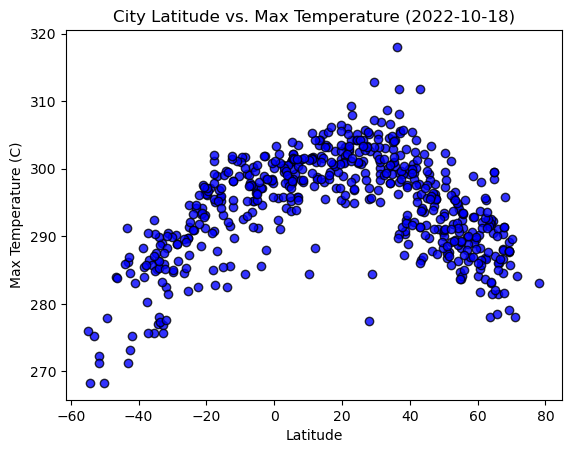

In [8]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,max_temps,color= "blue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

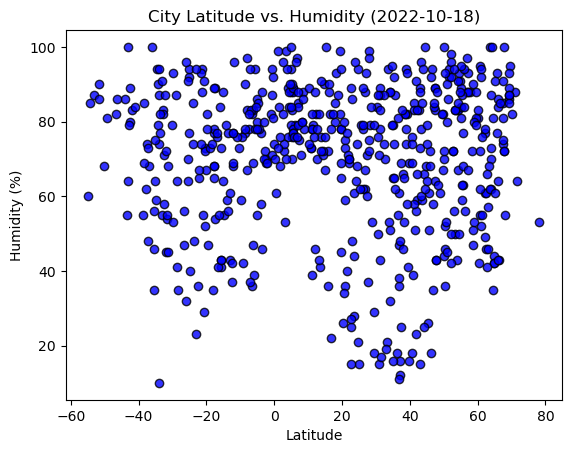

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,humidity,color= "blue", edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

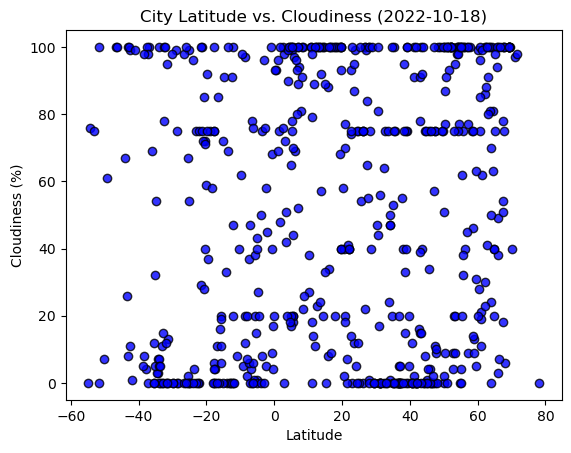

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,color= "blue", edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

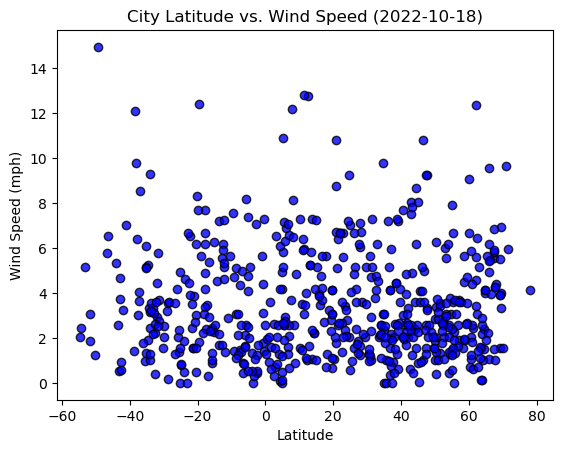

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,color= "blue", edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):

# Get regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    
    
 # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

 # Generate plots     
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    print(f"The r-squared is: {rvalue}")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tangalle,6.0240,80.7911,299.24,79,69,6.91,LK,1689643824
1,yellowknife,62.4560,-114.3525,295.44,46,100,3.09,CA,1689643561
2,berdigestyakh,62.0989,126.6992,295.70,61,86,4.57,RU,1689643824
3,olonkinbyen,70.9221,-8.7187,278.03,88,97,9.67,SJ,1689643824
5,guymon,36.6828,-101.4816,308.15,36,0,4.12,US,1689643825


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,mchinji,-13.7984,32.8802,282.46,59,0,1.70,MW,1689643824
6,touros,-5.1989,-35.4608,296.49,86,1,4.78,BR,1689643825
7,blackmans bay,-43.0167,147.3167,286.22,64,100,4.69,AU,1689643825
8,edinburgh of the seven seas,-37.0676,-12.3116,286.56,68,100,8.56,SH,1689643825
10,uturoa,-16.7333,-151.4333,298.92,76,11,5.38,PF,1689643826


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6276725729178255


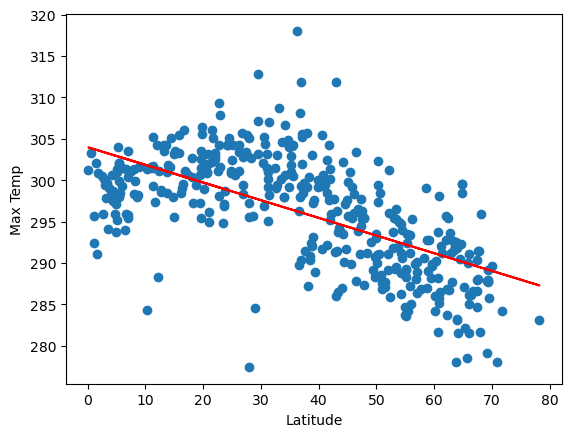

<function matplotlib.pyplot.show(close=None, block=None)>

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

plt.show

The r-squared is: 0.7871480909285662


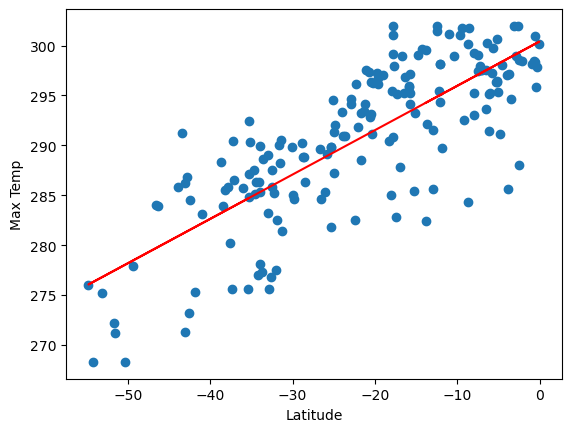

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.05205317209828698


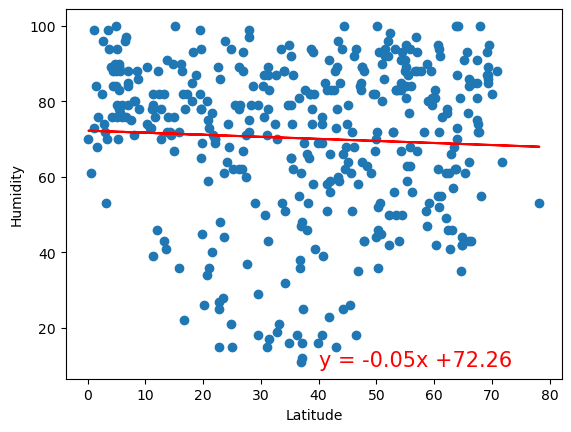

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.02778417127140501


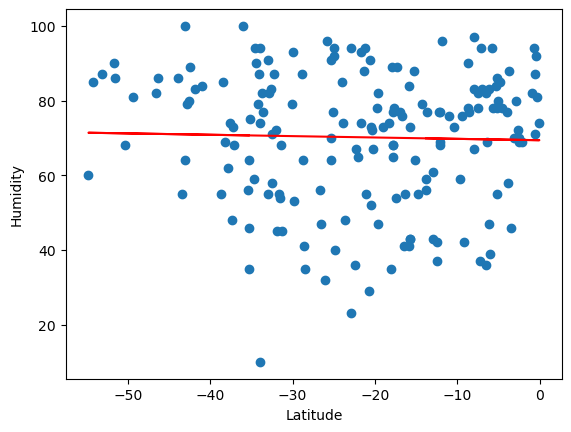

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no correlation between 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.028450452284828634


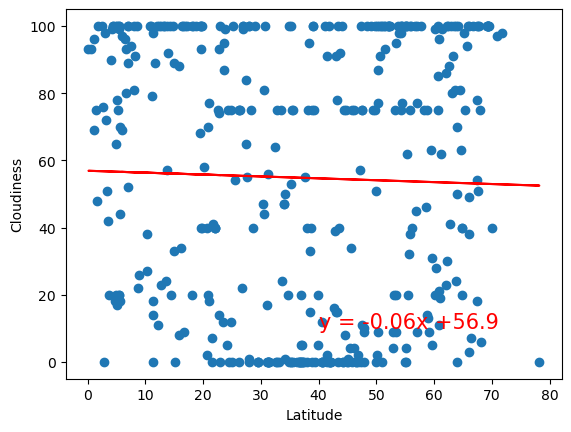

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.11654913568967118


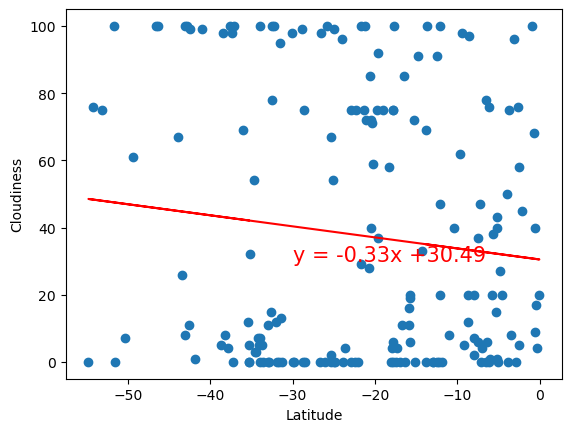

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is no correlation between the latitude and cloudiness for any of the hemispheres 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.036115766951258066


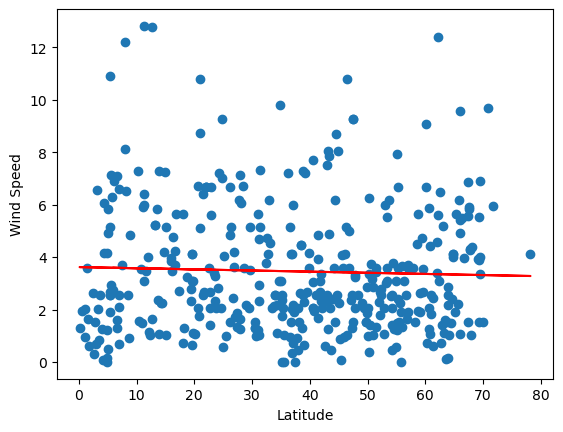

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.12403602856230965


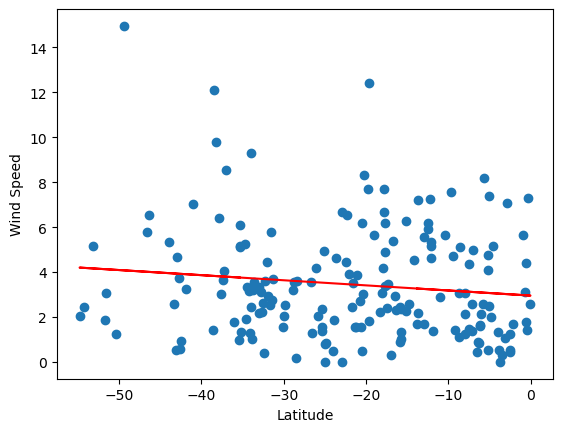

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no correlation between the latitude and wind speend for any of the hemispheres
